<a href="https://colab.research.google.com/github/RinatYaelGitHub/project/blob/main/Assignment2_supervised_learning_flow_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [ ]:

#Rinat Yael 3131
# student 2:

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_test=pd.read_csv('wine_test.csv')
df_train=pd.read_csv('wine_train.csv')

In [ ]:
df_train.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [ ]:
df_test.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [ ]:

def plot_all_distributions(df):

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    n = len(num_cols)
    cols = 3
    rows = (n + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))

    for i, col in enumerate(num_cols):
        plt.subplot(rows, cols, i + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()



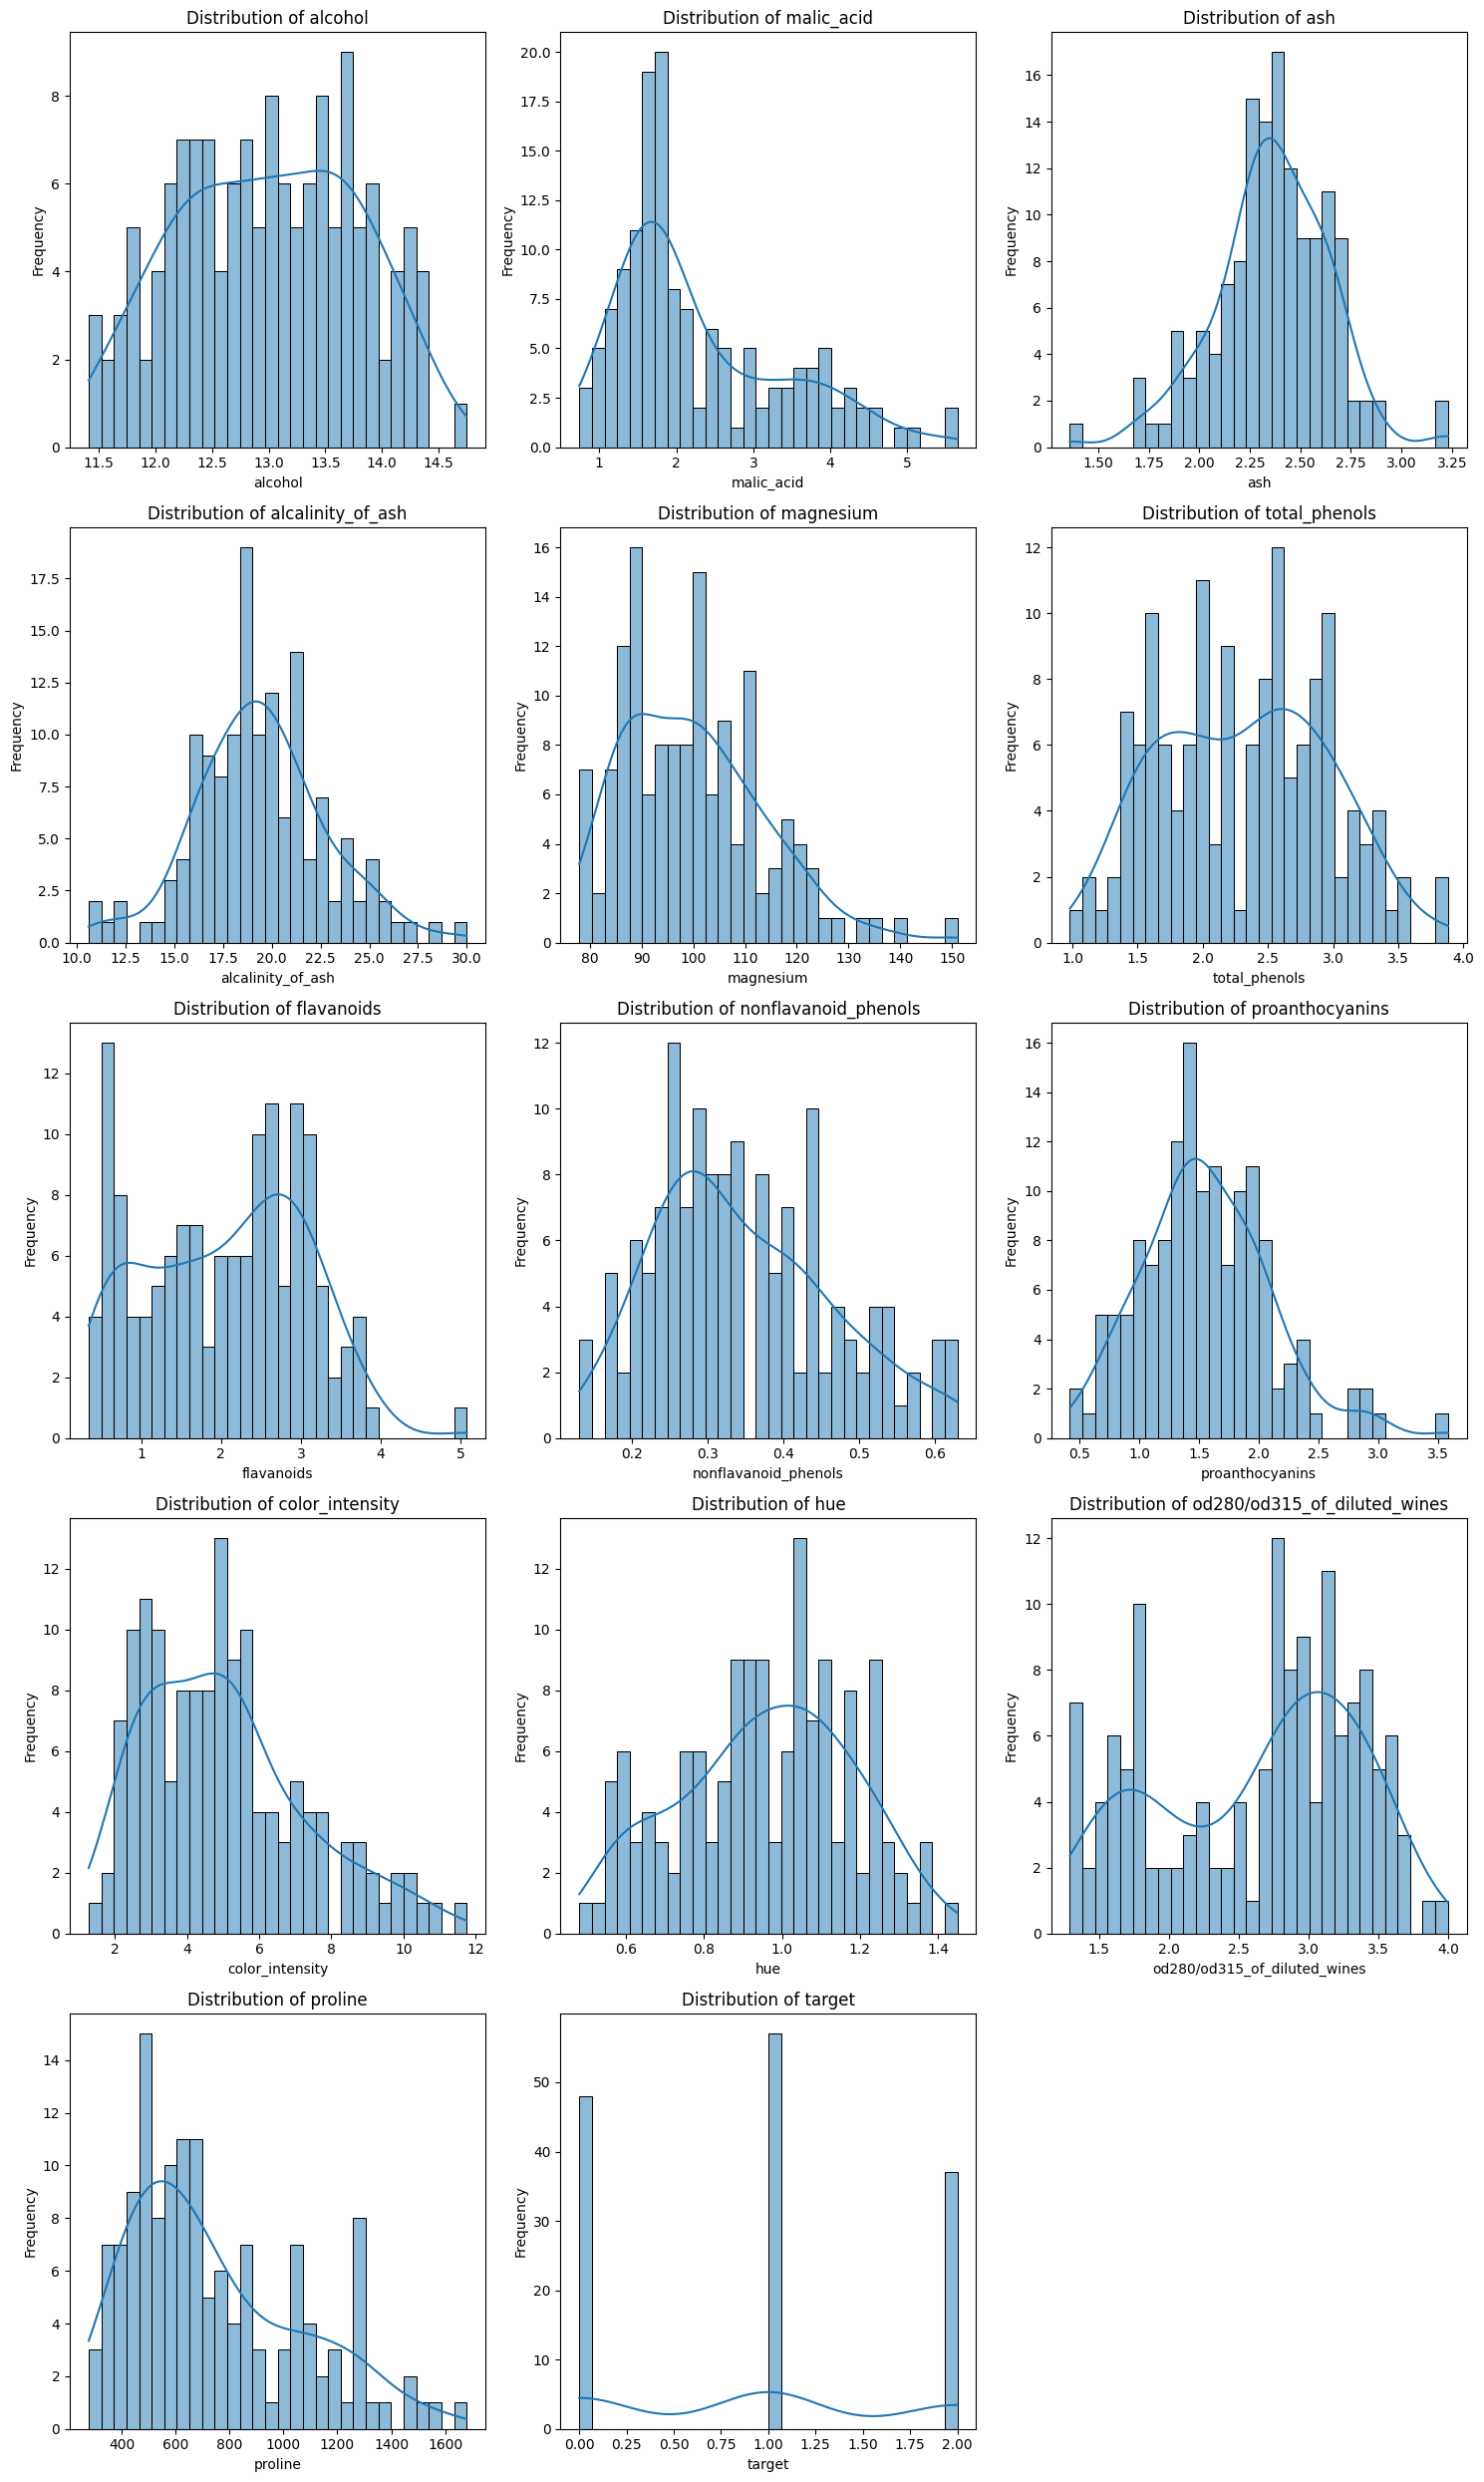

In [ ]:
plot_all_distributions(df_train)

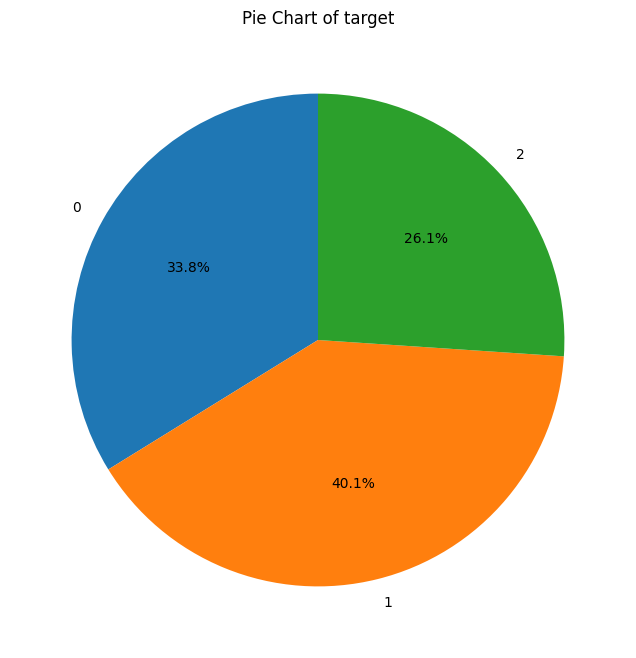

In [ ]:


# Count the occurrences of each category and sort by index
category_counts = df_train['target'].value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of target')
plt.ylabel('')  # Hides the y-label
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer, f1_score



# חציית הדאטה סט ל-X (מאפיינים) ו-y (עמודת מטרה)
X_train = df_train.drop('target', axis=1)  # הנחה ש' target ' היא שם העמודה הקטגורית
y_train = df_train['target']
X_test = df_test.drop('target', axis=1)  # הנחה ש' target ' היא שם העמודה הקטגורית
y_test = df_test['target']


# נורמליזציה של המאפיינים (אופציונלי אך מומלץ)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# הגדרת מודלים הלמידה
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# הגדרת פרמטרים לחיפוש עבור כל מודל
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

results=[]
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    param_grid = param_grids.get(model_name, {})
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               cv=5, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)


     # הוספת התוצאות לרשימה
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'CV F1 Macro Score': grid_search.best_score_,
    })




Training Random Forest...

Training KNN...

Training Naive Bayes...

Training Decision Tree...


In [ ]:
 # יצירת DataFrame להשוואת תוצאות
results_df = pd.DataFrame(results)
print("\nComparison of Model Results:")
results_df


Comparison of Model Results:


,Model,Best Parameters,CV F1 Macro Score
0,Random Forest,"{'max_depth': None, 'min_samples_split': 10, '...",0.978968
1,KNN,"{'n_neighbors': 9, 'weights': 'uniform'}",0.965044
2,Naive Bayes,{},0.965529
3,Decision Tree,"{'max_depth': None, 'min_samples_split': 5}",0.879010


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
import joblib

# Define scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Store results
results = []

for scaler_name, scaler in scalers.items():
    print(f"\nApplying {scaler_name}...")

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)  # Use the same scaler for X_test

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep 95% of variance
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)  # Transform X_test using the same PCA

    # Define the learning models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    # Define parameter grids for each model
    param_grids = {
        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        },
        'KNN': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        },
        'Decision Tree': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }

    for model_name, model in models.items():
        print(f"Training {model_name} with {scaler_name}...")
        param_grid = param_grids.get(model_name, {})
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   cv=5, scoring='f1_macro', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train)

        # Store results
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Best Parameters': grid_search.best_params_,
            'CV F1 Macro Score': grid_search.best_score_
        })

# Create a DataFrame from the results for better visualization
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df)

# Retrain the best model with the entire training dataset
best_result = results_df.loc[results_df['CV F1 Macro Score'].idxmax()]
best_model_name = best_result['Model']
best_scaler_name = best_result['Scaler']
best_params = best_result['Best Parameters']

# Get the best model instance and set parameters
final_model = models[best_model_name].set_params(**best_params)

# Scale and PCA the entire training dataset again for retraining
scaler = scalers[best_scaler_name]
X_train_scaled_final = scaler.fit_transform(X_train)
X_test_scaled_final = scaler.transform(X_test)

# Apply PCA
pca_final = PCA(n_components=0.95)
X_train_pca_final = pca_final.fit_transform(X_train_scaled_final)
X_test_pca_final = pca_final.transform(X_test_scaled_final)

# Fit the best model on the entire training data
final_model.fit(X_train_pca_final, y_train)

# Evaluate on the test set
test_score = f1_score(y_test, final_model.predict(X_test_pca_final), average='macro')

# Save the trained model
joblib.dump(final_model, 'best_model.pkl')

print(f"\n{best_model_name} retrained with best parameters: {best_params} using {best_scaler_name}.")
print(f"Test F1 Macro Score: {test_score:.4f} saved as 'best_model.pkl'.")


Applying StandardScaler...
Training Random Forest with StandardScaler...
Training KNN with StandardScaler...
Training Naive Bayes with StandardScaler...
Training Decision Tree with StandardScaler...

Applying MinMaxScaler...
Training Random Forest with MinMaxScaler...
Training KNN with MinMaxScaler...
Training Naive Bayes with MinMaxScaler...
Training Decision Tree with MinMaxScaler...

Applying RobustScaler...
Training Random Forest with RobustScaler...
Training KNN with RobustScaler...
Training Naive Bayes with RobustScaler...
Training Decision Tree with RobustScaler...

Results Summary:
            Scaler          Model  \
0   StandardScaler  Random Forest   
1   StandardScaler            KNN   
2   StandardScaler    Naive Bayes   
3   StandardScaler  Decision Tree   
4     MinMaxScaler  Random Forest   
5     MinMaxScaler            KNN   
6     MinMaxScaler    Naive Bayes   
7     MinMaxScaler  Decision Tree   
8     RobustScaler  Random Forest   
9     RobustScaler            KN

## Part 5 - Apply on test and show model performance estimation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import joblib

# Define scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Store results
results = []

for scaler_name, scaler in scalers.items():
    print(f"\nApplying {scaler_name}...")

    # Scale features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=0.95)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Define the learning models
    models = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    # Define parameter grids for each model
    param_grids = {
        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        },
        'KNN': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        },
        'Decision Tree': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    }

    for model_name, model in models.items():
        print(f"Training {model_name} with {scaler_name}...")
        param_grid = param_grids.get(model_name, {})
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                   cv=5, scoring='f1_macro', n_jobs=-1)
        grid_search.fit(X_train_pca, y_train)

        # Store results
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Best Parameters': grid_search.best_params_,
            'CV F1 Macro Score': grid_search.best_score_
        })

# Create a DataFrame from the results for better visualization
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df)

# Retrain the best model with the entire training dataset
best_result = results_df.loc[results_df['CV F1 Macro Score'].idxmax()]
best_model_name = best_result['Model']
best_scaler_name = best_result['Scaler']
best_params = best_result['Best Parameters']

# Get the best model instance and set parameters
final_model = models[best_model_name].set_params(**best_params)

# Scale and PCA the entire training dataset again for retraining
scaler = scalers[best_scaler_name]
X_train_scaled_final = scaler.fit_transform(X_train)
X_test_scaled_final = scaler.transform(X_test)

# Apply PCA
pca_final = PCA(n_components=0.95)
X_train_pca_final = pca_final.fit_transform(X_train_scaled_final)
X_test_pca_final = pca_final.transform(X_test_scaled_final)

# Fit the best model on the entire training data
final_model.fit(X_train_pca_final, y_train)

# Evaluate on the test set
y_pred = final_model.predict(X_test_pca_final)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

# Save the trained model
joblib.dump(final_model, 'best_model.pkl')

# Display evaluation results
print(f"\n{best_model_name} retrained with best parameters: {best_params} using {best_scaler_name}.")
print(f"Test F1 Macro Score: {f1:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Model saved as 'best_model.pkl'.")



Applying StandardScaler...
Training Random Forest with StandardScaler...
Training KNN with StandardScaler...
Training Naive Bayes with StandardScaler...
Training Decision Tree with StandardScaler...

Applying MinMaxScaler...
Training Random Forest with MinMaxScaler...
Training KNN with MinMaxScaler...
Training Naive Bayes with MinMaxScaler...
Training Decision Tree with MinMaxScaler...

Applying RobustScaler...
Training Random Forest with RobustScaler...
Training KNN with RobustScaler...
Training Naive Bayes with RobustScaler...
Training Decision Tree with RobustScaler...

Results Summary:
            Scaler          Model  \
0   StandardScaler  Random Forest   
1   StandardScaler            KNN   
2   StandardScaler    Naive Bayes   
3   StandardScaler  Decision Tree   
4     MinMaxScaler  Random Forest   
5     MinMaxScaler            KNN   
6     MinMaxScaler    Naive Bayes   
7     MinMaxScaler  Decision Tree   
8     RobustScaler  Random Forest   
9     RobustScaler            KN